# 200: Exampville Simulated Data

In [1]:
import larch, numpy, pandas, os, geopandas
larch.__version__

'5.2.11'

Welcome to Exampville, the best simulated town in this here part of the internet!

Exampville is provided with Larch to illustrate the
kind of data that a transportation planner might have available when building
a travel model.  This data is almost entirely fictional.

In [2]:
import larch.exampville

## TAZ Shapefile

The shapefile that includes a map of the travel analysis zones
in Exampville is stored in a zip file.

In [3]:
larch.exampville.files.shapefile

'../../data_warehouse/exampville_taz.zip'

Geopandas can open and read this data directly with unzipping it on
disk first, by including the "zip://" protocol in front of the filename.

In [4]:
taz_shape = geopandas.read_file("zip://"+larch.exampville.files.shapefile)

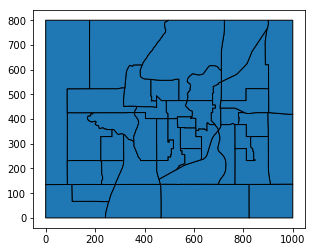

In [5]:
taz_shape.plot(edgecolor='k');

## TAZ Employment Data

In [6]:
larch.exampville.files.employment

'../../data_warehouse/exampville_employment.csv.gz'

In [7]:
emp = pandas.read_csv(larch.exampville.files.employment, index_col='TAZ')

In [8]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1 to 40
Data columns (total 3 columns):
NONRETAIL_EMP    40 non-null int64
RETAIL_EMP       40 non-null int64
TOTAL_EMP        40 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [9]:
emp.head()

,NONRETAIL_EMP,RETAIL_EMP,TOTAL_EMP
TAZ,,,
1,88,236,324
2,45,6,51
3,118,1,119
4,183,7,190
5,24,8,32


## Skims

The network skims for Exampville are stored in open matrix format.
Larch includes a OMX reader, which also embeds a number of handy
tools for processing OMX data into formats useful for discrete choice
analysis.

In [10]:
larch.exampville.files.skims

'../../data_warehouse/exampville_skims.omx'

In [11]:
skims = larch.OMX( larch.exampville.files.skims, mode='r' )
skims

<larch.OMX> ⋯/exampville_skims.omx
 |  shape:(40, 40)
 |  data:
 |    AUTO_COST    (float64)
 |    AUTO_DIST    (float64)
 |    AUTO_TIME    (float64)
 |    BIKE_TIME    (float64)
 |    TRANSIT_FARE (float64)
 |    TRANSIT_IVTT (float64)
 |    TRANSIT_OVTT (float64)
 |    WALK_DIST    (float64)
 |    WALK_TIME    (float64)

## Households

In [12]:
larch.exampville.files.hh

'../../data_warehouse/exampville_households.csv.gz'

In [13]:
hh = pandas.read_csv( larch.exampville.files.hh )

In [14]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
X           5000 non-null float64
Y           5000 non-null float64
INCOME      5000 non-null int64
geometry    5000 non-null object
HOMETAZ     5000 non-null int64
HHSIZE      5000 non-null int64
HHID        5000 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 273.5+ KB


In [15]:
hh.head()

,X,Y,INCOME,geometry,HOMETAZ,HHSIZE,HHID
0,591.56,302.94,114426,POINT (591.5599999999999 302.94),30,1,50000
1,605.69,293.28,122271,POINT (605.6900000000001 293.28),30,5,50001
2,586.10,315.76,25673,POINT (586.1 315.76),30,1,50002
3,557.38,301.54,67327,POINT (557.38 301.54),30,2,50003
4,588.03,281.32,86781,POINT (588.03 281.32),30,2,50004


## Persons

In [16]:
larch.exampville.files.person

'../../data_warehouse/exampville_persons.csv.gz'

In [17]:
pp = pandas.read_csv( larch.exampville.files.person )

In [18]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 8 columns):
PERSONID         9146 non-null int64
HHID             9146 non-null int64
HHIDX            9146 non-null int64
AGE              9146 non-null int64
WORKS            9146 non-null int64
N_WORK_TOURS     9146 non-null int64
N_OTHER_TOURS    9146 non-null int64
N_TOURS          9146 non-null int64
dtypes: int64(8)
memory usage: 571.7 KB


In [19]:
pp.head()

,PERSONID,HHID,HHIDX,AGE,WORKS,N_WORK_TOURS,N_OTHER_TOURS,N_TOURS
0,60000,50000,0,43,1,1,1,2
1,60001,50001,1,50,1,0,0,0
2,60002,50001,1,49,1,1,1,2
3,60003,50001,1,29,1,2,1,3
4,60004,50001,1,12,0,0,1,1


## Tours

In [20]:
larch.exampville.files.tour

'../../data_warehouse/exampville_tours.csv.gz'

In [21]:
tour = pandas.read_csv( larch.exampville.files.tour )

In [22]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15934 entries, 0 to 15933
Data columns (total 6 columns):
TOURID      15934 non-null int64
HHID        15934 non-null int64
PERSONID    15934 non-null int64
DTAZ        15934 non-null int64
TOURMODE    15934 non-null int64
TOURPURP    15934 non-null int64
dtypes: int64(6)
memory usage: 747.0 KB


In [23]:
tour.head()

,TOURID,HHID,PERSONID,DTAZ,TOURMODE,TOURPURP
0,0,50000,60000,13,1,1
1,1,50000,60000,16,1,2
2,2,50001,60002,28,1,1
3,3,50001,60002,37,1,2
4,4,50001,60003,26,1,1
